In [ ]:
#Importing Libraries

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import re


In [ ]:
#Importing Sklearn Libraries

from sklearn.model_selection import train_test_split
from pandas.plotting import scatter_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report
from sklearn import svm
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
from sklearn.feature_selection import RFE
from sklearn.naive_bayes import GaussianNB
from sklearn import model_selection
from sklearn.metrics import confusion_matrix



---
**Reading the CSV file**

---





In [ ]:
#Importing and Reading the CSV file
#Defining CSV file path


csv_filePath = "MP2_Data.csv"

df = pd.read_csv(csv_filePath)
#Printing the csv file imported

df.head()


Finding co-relation

In [ ]:
df.corr(method ='pearson')




---
# STEP 1
**Data Processing**

*   Are there any missing values?
*   What are your features?
*   Are you keeping every feature?

---





In [ ]:
# checking for all the null values present in the csv file

df.isnull().sum()



In [ ]:
# showing what features

n_features = df.columns.tolist()
print("\nFeatures:")
print(n_features)


Features:
['ID', 'Week2_Quiz1', 'Week3_MP1', 'Week3_PR1', 'Week5_MP2', 'Week5_PR2', 'Week7_MP3', 'Week7_PR3', 'Week4_Quiz2', 'Week6_Quiz3', 'Week8_Total', 'Week1_Stat0', 'Week1_Stat2', 'Week1_Stat3', 'Week2_Stat0', 'Week2_Stat1', 'Week2_Stat2', 'Week2_Stat3', 'Week3_Stat0', 'Week3_Stat1', 'Week3_Stat2', 'Week3_Stat3', 'Week4_Stat0', 'Week4_Stat1', 'Week4_Stat2', 'Week4_Stat3', 'Week5_Stat0', 'Week5_Stat1', 'Week5_Stat2', 'Week5_Stat3', 'Week6_Stat0', 'Week6_Stat1', 'Week6_Stat2', 'Week6_Stat3', 'Week7_Stat0', 'Week7_Stat1', 'Week7_Stat2', 'Week7_Stat3', 'Week8_Stat0', 'Week8_Stat1', 'Week8_Stat2', 'Week8_Stat3', 'Week9_Stat0', 'Week9_Stat1', 'Week9_Stat2', 'Week9_Stat3', 'Grade', 'stat0', 'stat1', 'stat2', 'stat3', 'Week_Stat0']


In [ ]:

# getting columns having varying values
columns_with_varying_values = []
original_columns = df.columns
for col in original_columns:
    if len(df[col].value_counts()) > 1:
        columns_with_varying_values.append(col)

# only including columns that have varying values
# After checking the values, the column Week1_Stat1 was found to have only zero
# values so removing the column by keeping only those columns with varying values
df = df[columns_with_varying_values]

# printing the column with vaying values only
print(df)

In [ ]:
# checking if the dataset is balanced
df['Grade'].value_counts()


In [ ]:

feature_columns = [col for col in df.columns if col not in ['ID', 'Grade', 'is_train', 'Week8_Total']]

grade_columns = ["Week2_Quiz1", "Week3_MP1", "Week3_PR1", "Week4_Quiz2", "Week5_MP2", "Week5_PR2", "Week6_Quiz3", "Week7_MP3", "Week7_PR3"]

#Combining stat columns according to its type (Stat0, Stat1, Stat2, Stat3)
grouped_columns = {}
for col in feature_columns:
    col_parts = col.split('_')
    if len(col_parts) >= 2 and col_parts[1].startswith('Stat'):
        col_type = col_parts[1]
        grouped_columns.setdefault(col_type, []).append(col)

#creating new columns by summing up columns within each group
for col_type, cols in grouped_columns.items():
    df[f'stat{col_type[-1]}'] = df[cols].sum(axis=1)

filtered_feature_columns = grade_columns + ['stat0', 'stat1', 'stat2', 'stat3']
print(filtered_feature_columns)

['Week2_Quiz1', 'Week3_MP1', 'Week3_PR1', 'Week4_Quiz2', 'Week5_MP2', 'Week5_PR2', 'Week6_Quiz3', 'Week7_MP3', 'Week7_PR3', 'stat0', 'stat1', 'stat2', 'stat3']




---
# STEP 2
# DATA SPLIT
**Training and Testing DataSet**

*  Divide your data in an appropriate proportion to train and test dataset

---





In [ ]:

# separating the train and test data rows
df['is_train'] = np.random.uniform(0, 1, len(df)) <= 0.80

train_df, test_df = df[df['is_train']==True], df[df['is_train']==False]

# checking the Grade value distribution in the training dataset
train_df['Grade'].value_counts()


In [ ]:

# show number of observations in the train and test dataframes
print("Number of observations in the training data: ", train_df.shape[0])
print("Number of observations in the test data: ", test_df.shape[0])

Number of observations in the training data:  82
Number of observations in the test data:  25


In [ ]:
#displaying the finalized column
df_dataset = df[['Week8_Total','stat0','stat1','stat2','stat3','Grade']]
df_dataset.head(10)

,Week8_Total,stat0,stat1,stat2,stat3,Grade
0,82.97,236,119,8,4,4
1,82.43,930,85,17,37,4
2,79.44,338,65,8,9,3
3,80.65,1106,74,17,15,3
4,67.68,298,62,7,17,2
5,71.79,730,70,7,19,3
6,0.00,4,0,0,0,0
7,99.71,688,84,15,11,5
8,85.31,334,29,5,6,4
9,78.50,424,105,13,5,3


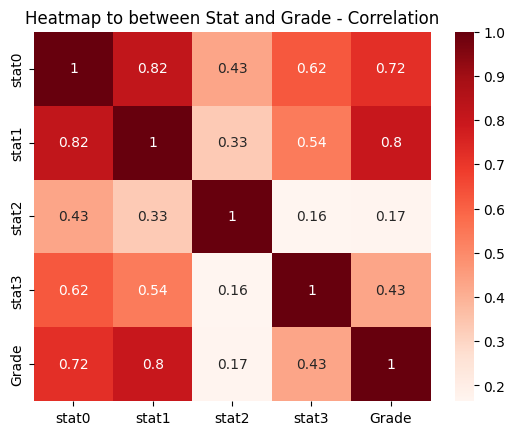

<Figure size 500x600 with 0 Axes>

In [ ]:
# checking the correlation of the stat columns with the grade column
cols_to_use = ['stat0', 'stat1', 'stat2', 'stat3', 'Grade']

sns.heatmap(df[cols_to_use].corr(), annot=True, cmap='Reds')

#giving a size to the plot
plt.title('Heatmap to between Stat and Grade - Correlation')
plt.figure(figsize=(5,6))
plt.show()


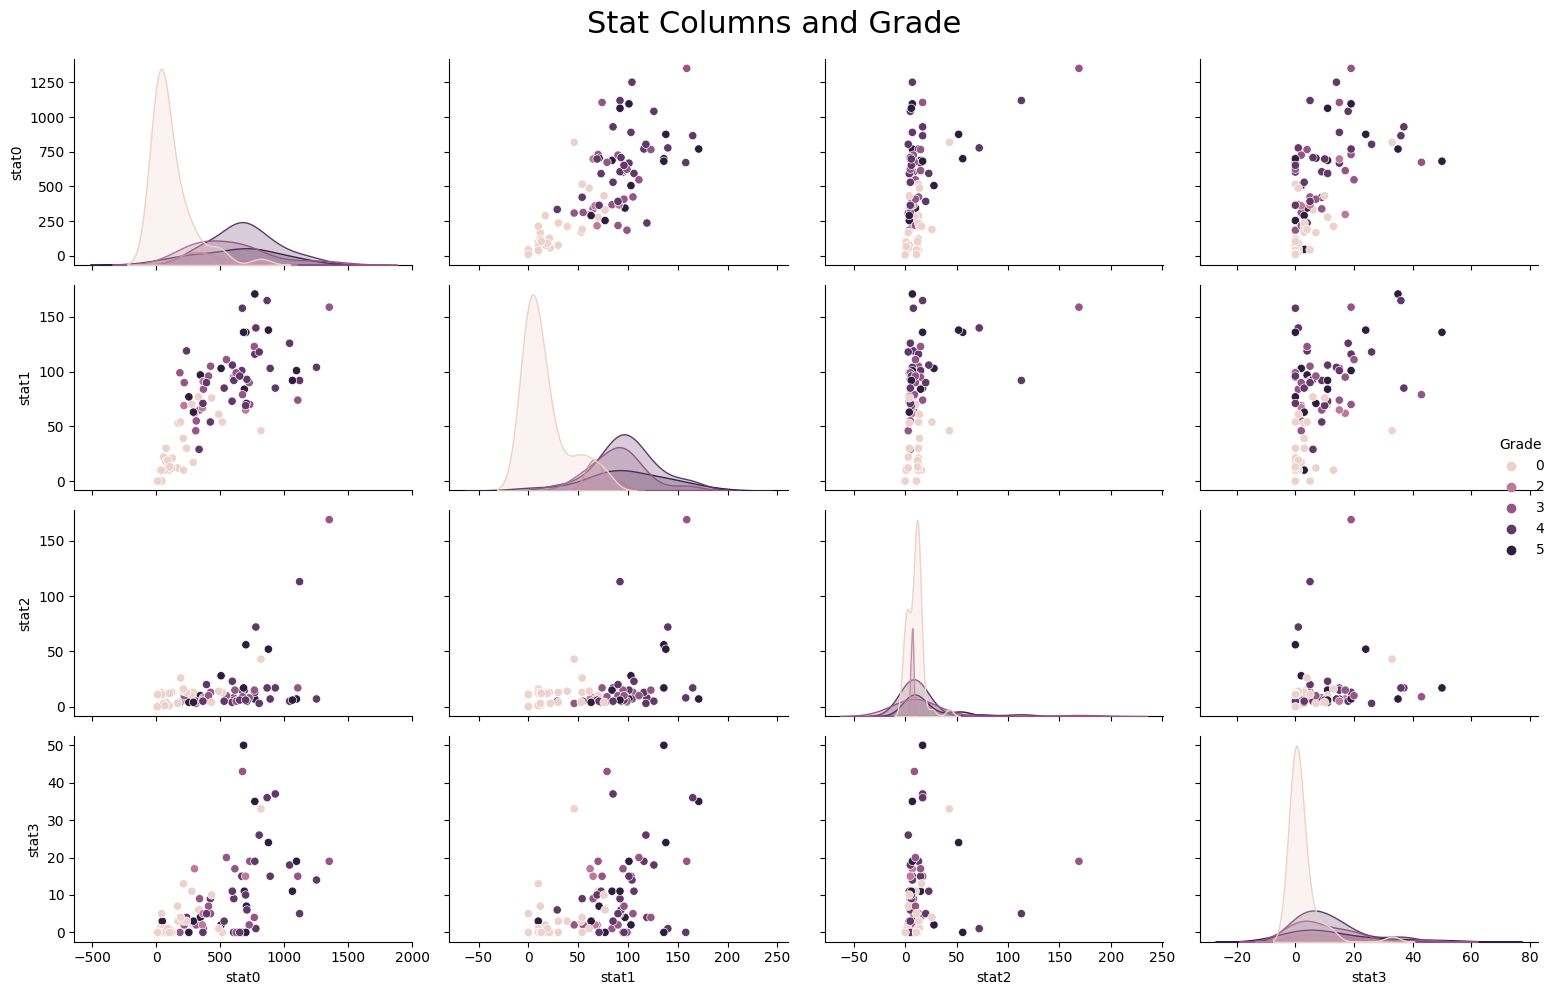

In [ ]:
#plotting pairplot
pair_plot = sns.pairplot(df[cols_to_use], hue='Grade', height=2.5, aspect=1.5)
pair_plot.fig.suptitle('Stat Columns and Grade', y= 0.99, size=22)

#creating space between title and plot
pair_plot.fig.subplots_adjust(top=0.84)



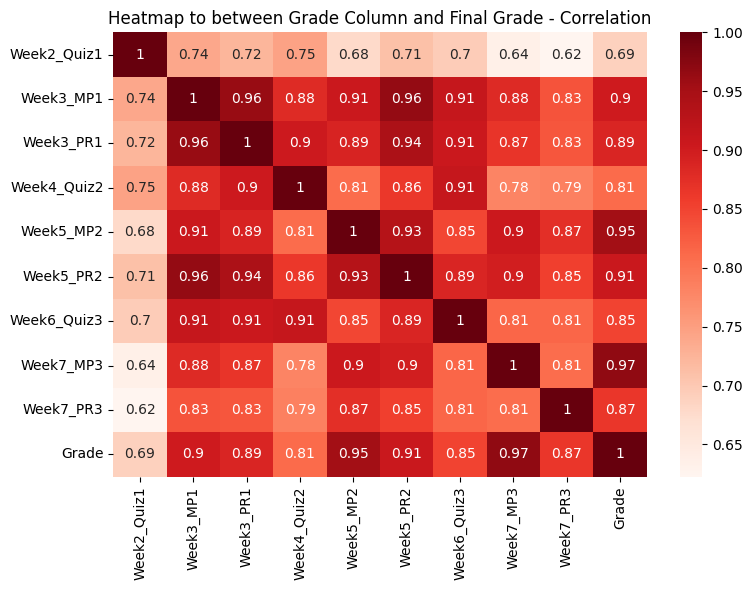

In [ ]:
# checking the correlation of the grade columns with the final Grade column
cols_to_check = grade_columns + ['Grade']
plt.figure(figsize=(8,6))
sns.heatmap(df[cols_to_check].corr(), annot=True, cmap='Reds')
#giving title and size of the plot
plt.title('Heatmap to between Grade Column and Final Grade - Correlation')
plt.show()

In [ ]:
df.head()

,ID,Week2_Quiz1,Week3_MP1,Week3_PR1,Week5_MP2,Week5_PR2,Week7_MP3,Week7_PR3,Week4_Quiz2,Week6_Quiz3,...,Week9_Stat1,Week9_Stat2,Week9_Stat3,Grade,stat0,stat1,stat2,stat3,Week_Stat0,is_train
0,ML-2020-1,5.00,15.0,5.0,16.09,5.00,21.88,5.0,5.00,5.0,...,6,1,0,4,236,119,8,4,118,False
1,ML-2020-2,3.33,15.0,5.0,17.83,5.00,22.27,5.0,4.00,5.0,...,3,2,5,4,930,85,17,37,465,False
2,ML-2020-3,1.67,13.0,5.0,15.22,5.00,27.05,2.5,5.00,5.0,...,0,1,0,3,338,65,8,9,169,True
3,ML-2020-4,2.50,14.0,5.0,10.00,5.00,31.02,5.0,3.13,5.0,...,6,0,0,3,1106,74,17,15,553,True
4,ML-2020-6,0.00,15.0,5.0,12.17,4.93,15.91,5.0,4.67,5.0,...,3,1,0,2,298,62,7,17,149,True


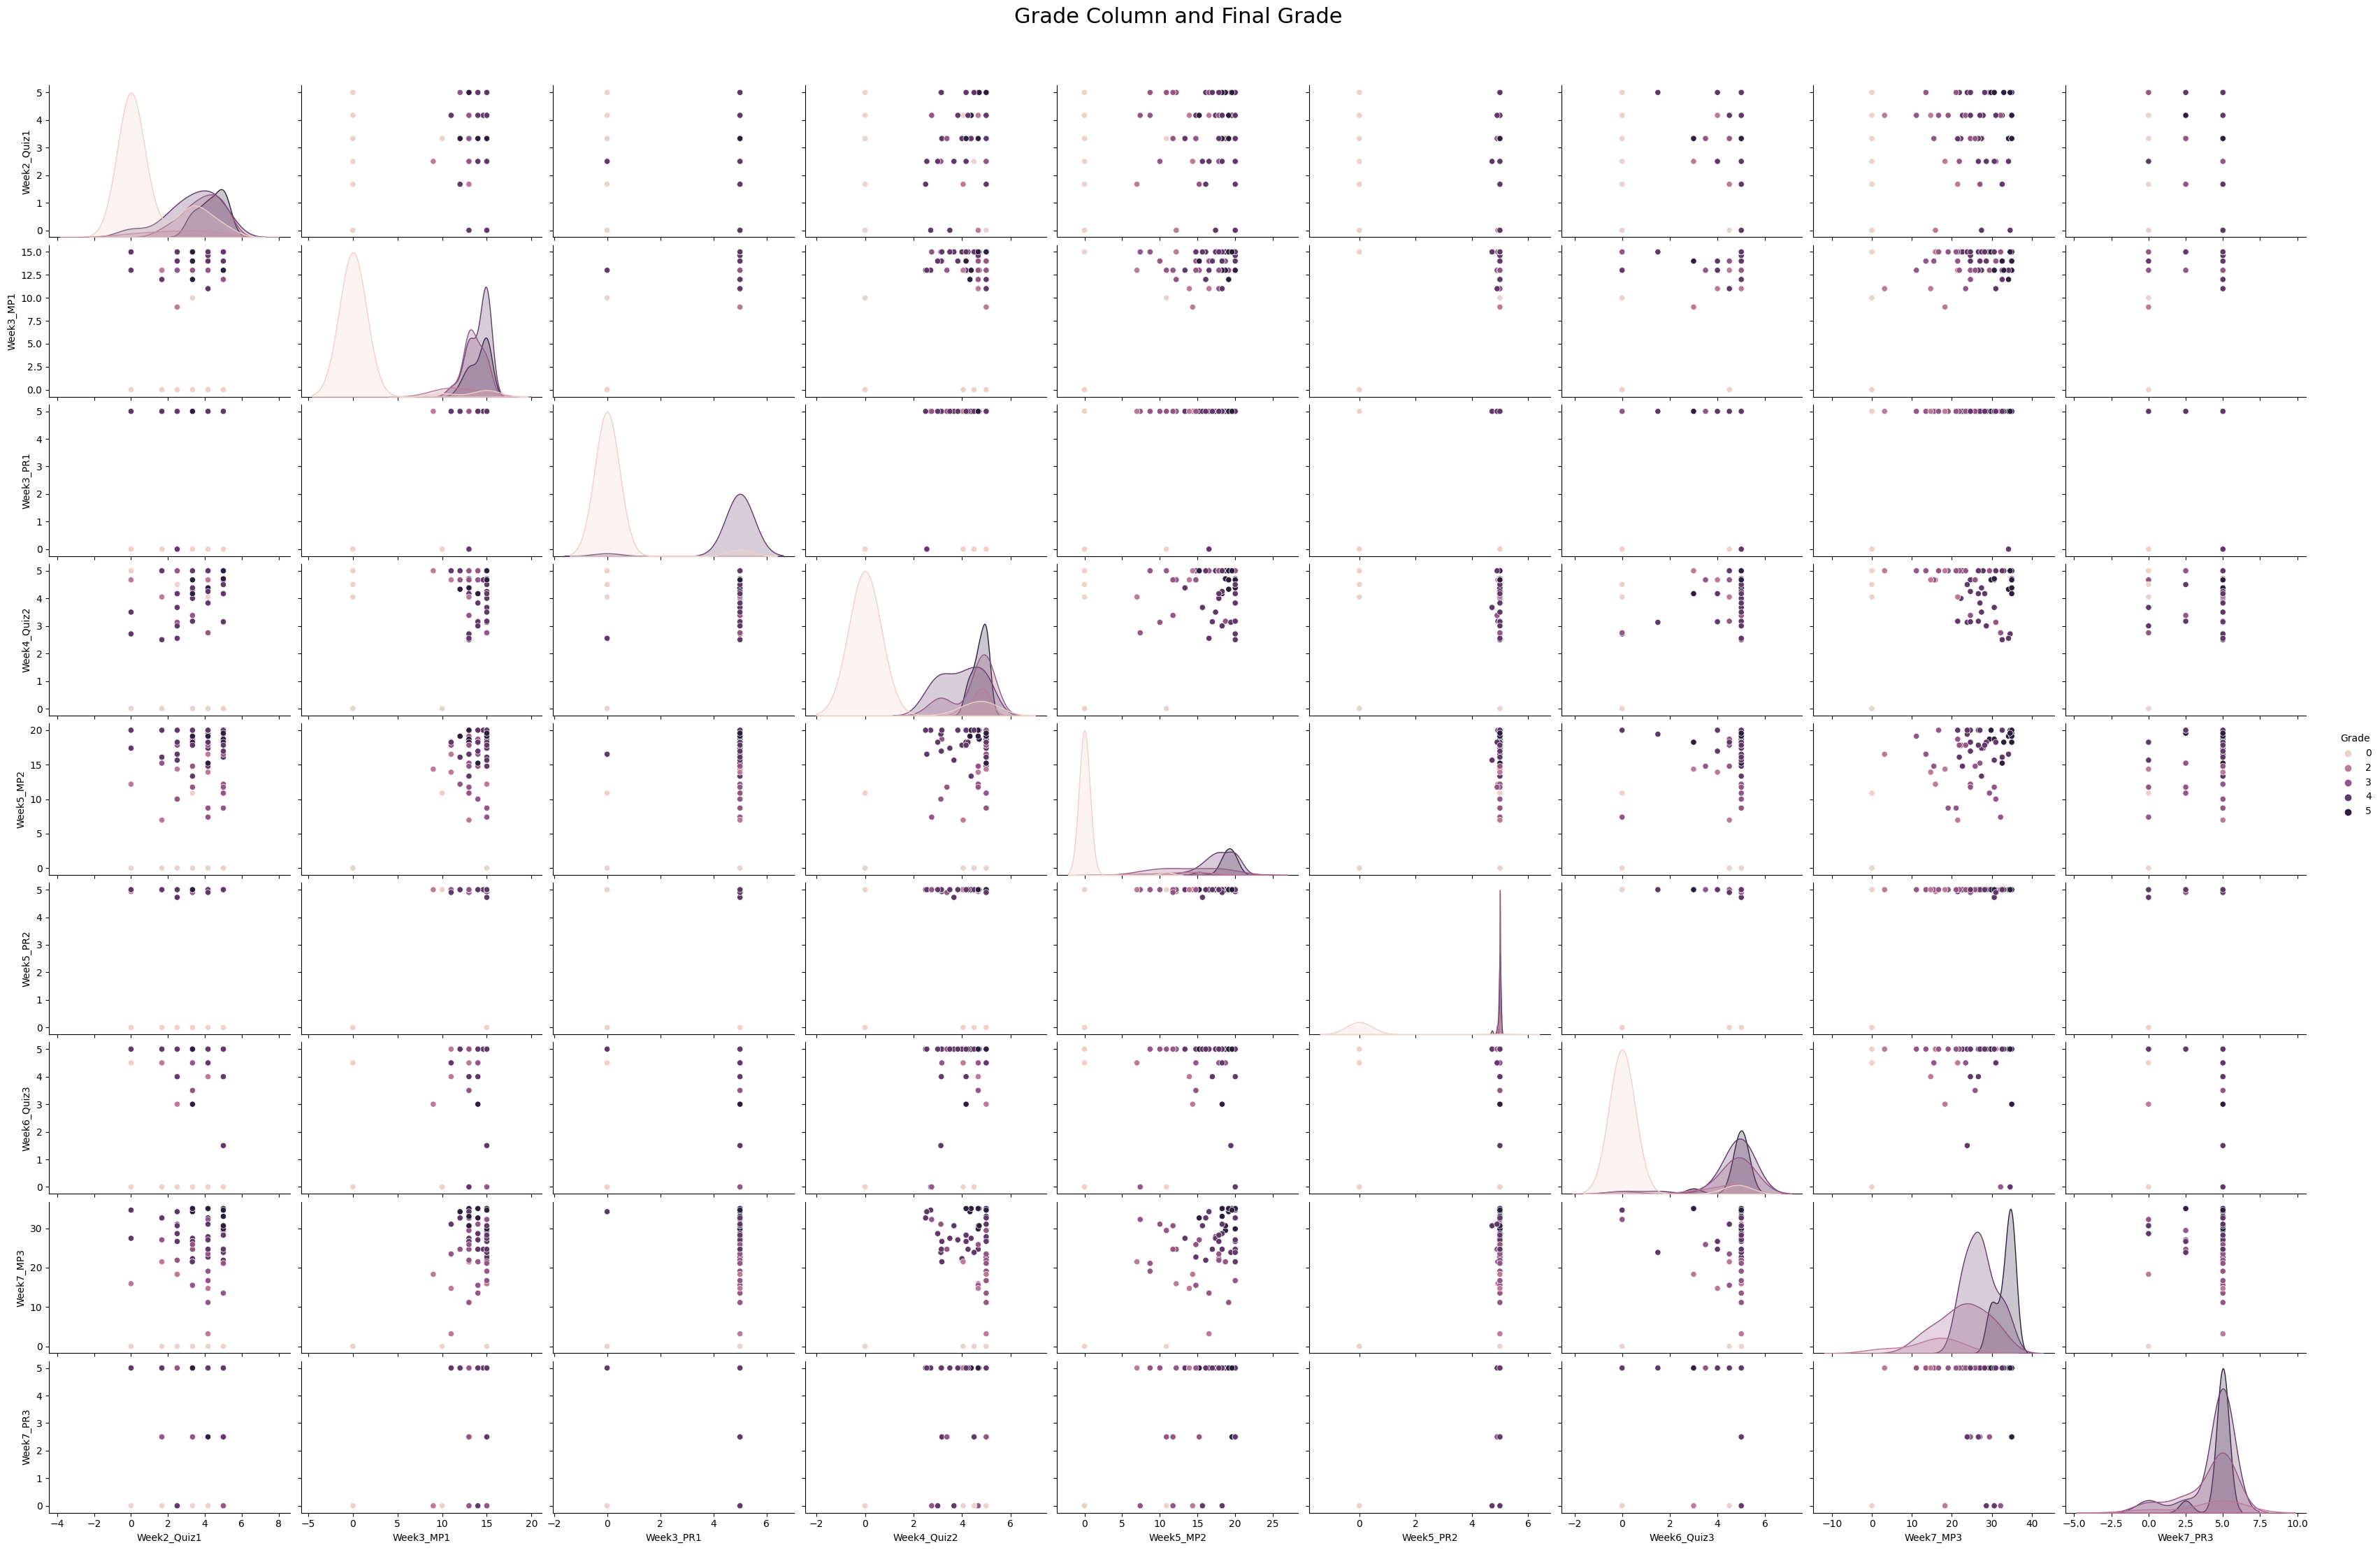

In [ ]:
#plotting pairplot
pair_plot = sns.pairplot(df[cols_to_check], hue='Grade', height=2.5, aspect=1.5)
pair_plot.fig.suptitle('Grade Column and Final Grade', y= 0.99, size=22)

#creating space between title and plot
pair_plot.fig.subplots_adjust(top=0.94)




---
# STEP 3
# MODEL Training
**First Approach**

* Random Forest Classifier

---





In [ ]:
df_dataset['is_train'] = np.random.uniform(0, 1, len(df_dataset)) <= .80
df_dataset.head(10)

<ipython-input-125-06ebbecbd106>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dataset['is_train'] = np.random.uniform(0, 1, len(df_dataset)) <= .80


,Week8_Total,stat0,stat1,stat2,stat3,Grade,is_train
0,82.97,236,119,8,4,4,True
1,82.43,930,85,17,37,4,True
2,79.44,338,65,8,9,3,False
3,80.65,1106,74,17,15,3,True
4,67.68,298,62,7,17,2,True
5,71.79,730,70,7,19,3,True
6,0.00,4,0,0,0,0,False
7,99.71,688,84,15,11,5,False
8,85.31,334,29,5,6,4,True
9,78.50,424,105,13,5,3,True


In [ ]:
#creating two new dataFrame for testing rows and testing rows
train,test = df_dataset[df_dataset['is_train']==True], df_dataset[df_dataset['is_train']==False]

In [ ]:
#showing the no of observations in the training and testing dataset
print("Number of observation in training dataset:", len(train))
print("Number of observation in testing dataset:", len(test))

Number of observation in training dataset: 89
Number of observation in testing dataset: 18


In [ ]:
#creating a list list of the features column's name
features_list = df_dataset.columns[:5]

#displaying features list
features_list

Index(['Week8_Total', 'stat0', 'stat1', 'stat2', 'stat3'], dtype='object')

In [278]:

##creating a random forest classifier


random_forest_classifier = RandomForestClassifier(n_jobs=2, random_state=0)

#training the classifier to train features and learn how they relate

random_forest_classifier.fit(train_df[features_list],train_df['Grade'])

RandomForestClassifier(n_jobs=2, random_state=0)



---
# STEP 4
# PERFORMANCE EVALUATION

---





In [279]:
#applying the classifier we train to test data which it has never seen before
random_forest_classifier.predict(test[features_list])

array([3, 3, 0, 0, 5, 4, 0, 3, 3, 5, 3, 4, 4, 0, 0, 0, 0, 0])

In [280]:
#viewing the predicted probabilities of the first 10 observations
random_forest_classifier.predict_proba(test[features_list])[0:10]

array([[0.03, 0.04, 0.89, 0.02, 0.02],
       [0.05, 0.1 , 0.59, 0.2 , 0.06],
       [1.  , 0.  , 0.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  , 0.  , 0.  ],
       [0.01, 0.02, 0.02, 0.11, 0.84],
       [0.  , 0.  , 0.12, 0.53, 0.35],
       [0.83, 0.05, 0.1 , 0.01, 0.01],
       [0.  , 0.  , 0.38, 0.37, 0.25],
       [0.02, 0.01, 0.89, 0.05, 0.03],
       [0.  , 0.  , 0.04, 0.17, 0.79]])

In [281]:
#creating actual grade for each predicted grades
prediction = random_forest_classifier.predict(test[features_list])

#viewing the pridicted grades for first ten rows
prediction[0:10]

array([3, 3, 0, 0, 5, 4, 0, 3, 3, 5])

In [282]:
#viewing the actual grades
test['Grade'].head()

3     3
5     3
6     0
10    0
13    5
Name: Grade, dtype: int64

In [283]:
# checking the predictions
pd.crosstab(test['Grade'], prediction, rownames=['Actual Grade'], colnames=['Predicted Grade'])


Predicted Grade,0,3,4,5
Actual Grade,,,,
0,8,0,0,0
3,0,4,0,0
4,0,1,3,0
5,0,0,0,2


In [284]:
# computing accuracy score for the model to evaluate the model performance
print(classification_report(test['Grade'], prediction))
random_accuracy = accuracy_score(test['Grade'], prediction)
print("Accuracy: ", random_accuracy)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           3       0.80      1.00      0.89         4
           4       1.00      0.75      0.86         4
           5       1.00      1.00      1.00         2

    accuracy                           0.94        18
   macro avg       0.95      0.94      0.94        18
weighted avg       0.96      0.94      0.94        18

Accuracy:  0.9444444444444444


<Axes: xlabel='Predicted Grade', ylabel='Actual Grade'>

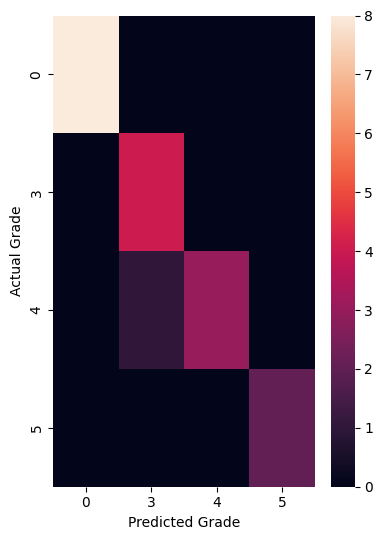

In [285]:
#cross tab showing the predicted grade and actual grade
cross_tab_data = pd.crosstab(test['Grade'], prediction, rownames=['Actual Grade'], colnames=['Predicted Grade'])
sns.heatmap(cross_tab_data)

In [ ]:
#calculating the length of the prediction
length = len(prediction)
length


18

In [ ]:
#Testing the predictions
test['Predictions'] = prediction.tolist()
test

<ipython-input-175-ea9c925e7a83>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions'] = prediction.tolist()


,Week8_Total,stat0,stat1,stat2,stat3,Grade,is_train,Predictions
3,80.65,1106,74,17,15,3,False,3
5,71.79,730,70,7,19,3,False,3
6,0.00,4,0,0,0,0,False,0
10,0.00,20,0,1,0,0,False,0
13,92.99,704,71,8,7,5,False,5
14,89.78,672,158,8,0,4,False,4
19,35.00,330,77,8,6,0,False,0
22,81.48,778,140,72,1,4,False,4
27,80.18,368,84,5,1,3,False,3
36,91.00,344,97,10,4,5,False,5


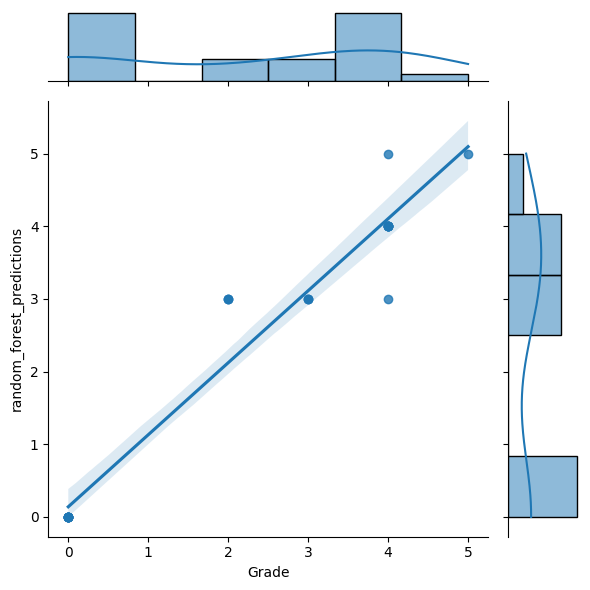

In [286]:

# plotting a joint plot with the Actual Grade on the X-axis and the predictions
# on the Y-axis.
plot = sns.jointplot(data=test_df, x="Grade", y="random_forest_predictions", kind="reg")


In [ ]:
#merging the predicted data with the main dataset

merge_prediction = pd.merge(df,test, on=['Week8_Total','stat0','stat1','stat2','stat3'])

print((merge_prediction).head(15))
print("\n")

             ID  Week2_Quiz1  Week3_MP1  Week3_PR1  Week5_MP2  Week5_PR2  \
0     ML-2020-4         2.50       14.0        5.0      10.00        5.0   
1     ML-2020-7         3.33       14.0        5.0      14.78        5.0   
2     ML-2020-8         0.00        0.0        0.0       0.00        0.0   
3    ML-2020-16         0.00        0.0        0.0       0.00        0.0   
4    ML-2020-21         3.33       12.0        5.0      19.13        5.0   
5    ML-2020-22         1.67       13.0        5.0      20.00        5.0   
6    ML-2020-29         5.00       15.0        5.0       0.00        0.0   
7    ML-2020-33         3.33       13.0        5.0      13.33        5.0   
8    ML-2020-38         3.33       14.0        5.0      18.70        5.0   
9    ML-2020-48         4.17       14.0        5.0      15.22        5.0   
10   ML-2020-65         3.33       13.0        5.0      11.74        4.9   
11   ML-2020-98         4.17       15.0        5.0      18.26        5.0   
12  ML-2020-

In [ ]:
#saving file to csv
merge_prediction.to_csv('rf_pred.csv', sep=',')


In [ ]:

accuracy_scoreRF = accuracy_score(test['Grade'], prediction)
accuracy_scoreRF

1.0

In [ ]:
important_feature = list(zip(train[features_list], random_forest_classifier.feature_importances_))
important_feature

[('Week8_Total', 0.5463484635781372),
 ('stat0', 0.1566624373496215),
 ('stat1', 0.1702671041518155),
 ('stat2', 0.0688302707757306),
 ('stat3', 0.05789172414469528)]

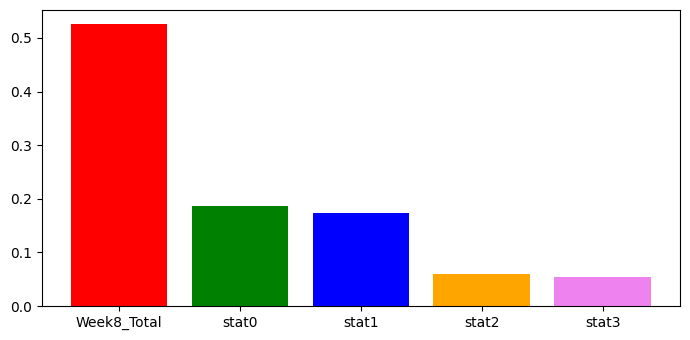

In [287]:
# Set the figure size
plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True
colors=["Red", "Green", "Blue", "Orange", "Violet"]

# Plot bar chart with data points
plt.bar(features_list, random_forest_classifier.feature_importances_,color=colors)

# Display the plot
plt.show()




```
# This is formatted as code
```



---
# STEP 3
# MODEL Training
**Second Approach**

* Naive Bayes Classifier


---





In [301]:
df.head(5)

,ID,Week2_Quiz1,Week3_MP1,Week3_PR1,Week5_MP2,Week5_PR2,Week7_MP3,Week7_PR3,Week4_Quiz2,Week6_Quiz3,...,Week9_Stat1,Week9_Stat2,Week9_Stat3,Grade,stat0,stat1,stat2,stat3,Week_Stat0,is_train
0,ML-2020-1,5.00,15.0,5.0,16.09,5.00,21.88,5.0,5.00,5.0,...,6,1,0,4,236,119,8,4,118,False
1,ML-2020-2,3.33,15.0,5.0,17.83,5.00,22.27,5.0,4.00,5.0,...,3,2,5,4,930,85,17,37,465,False
2,ML-2020-3,1.67,13.0,5.0,15.22,5.00,27.05,2.5,5.00,5.0,...,0,1,0,3,338,65,8,9,169,True
3,ML-2020-4,2.50,14.0,5.0,10.00,5.00,31.02,5.0,3.13,5.0,...,6,0,0,3,1106,74,17,15,553,True
4,ML-2020-6,0.00,15.0,5.0,12.17,4.93,15.91,5.0,4.67,5.0,...,3,1,0,2,298,62,7,17,149,True


In [ ]:
#Initialize Gaussian Naive Bayes
naive_bayes_classifier = GaussianNB()


In [300]:

naive_bayes_classifier.fit(train[features_list], train['Grade'])

GaussianNB()

In [299]:

#Predicting for the Test Set
prediction_nbs = naive_bayes_classifier.predict(test[features_list])


#Prediction Probability
prob_pos_nbs = naive_bayes_classifier.predict_proba(test[features_list])[:, 1]

In [298]:
prediction_nbs


array([4, 2, 0, 0, 5, 4, 0, 3, 3, 5, 3, 4, 4, 0, 0, 0, 0, 0])



---
# STEP 4
# PERFORMANCE EVALUATION

---





In [ ]:
prediction_nbs
length1= len(prediction_nbs)
length1


18

In [297]:
#creating the prediction file by concatenation between original and predicted dataset
#reshaping for concatenation
nbs_prediction_df = pd.DataFrame(prediction_nbs.reshape(length1,1))

#column renaming to indicate the predictions
nbs_prediction_df.rename(columns={0:'Predictions'}, inplace=True)
nbs_prediction_df

,Predictions
0,4
1,2
2,0
3,0
4,5
5,4
6,0
7,3
8,3
9,5


In [296]:
x_validation_df = test[features_list]

x_validation_df

,Week8_Total,stat0,stat1,stat2,stat3
3,80.65,1106,74,17,15
5,71.79,730,70,7,19
6,0.00,4,0,0,0
10,0.00,20,0,1,0
13,92.99,704,71,8,7
14,89.78,672,158,8,0
19,35.00,330,77,8,6
22,81.48,778,140,72,1
27,80.18,368,84,5,1
36,91.00,344,97,10,4


In [295]:
#concatenating the two pandas dataframes over the columns to create a prediction dataset
x_validation_df['Predictions'] = prediction_nbs.tolist()

x_validation_df

<ipython-input-295-7d644b23e1c7>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Week8_Total,stat0,stat1,stat2,stat3,Predictions
3,80.65,1106,74,17,15,4
5,71.79,730,70,7,19,2
6,0.00,4,0,0,0,0
10,0.00,20,0,1,0,0
13,92.99,704,71,8,7,5
14,89.78,672,158,8,0,4
19,35.00,330,77,8,6,0
22,81.48,778,140,72,1,3
27,80.18,368,84,5,1,3
36,91.00,344,97,10,4,5


In [294]:
# Create a scatter plot using Plotly Express
fig = px.scatter(test, x="Grade", y="Predictions", title="Actual vs. Predicted Grades",
                 labels={"Grade": "Actual Grade", "prediction": "Predicted Grade"},
                 opacity=0.5, color_discrete_sequence=['blue'])

# Set the width and height of the figure
fig.update_layout(
    width=700,
    height=500,
)

# Show the plot
fig.show()

In [293]:
#merging the prediction with original dataset
prediction_comp = pd.merge(df,x_validation_df, on=['Week8_Total','stat0','stat1','stat2','stat3'])

#printing top 15 rows of data of final predictions
print((prediction_comp).head(13))
print("\n")

             ID  Week2_Quiz1  Week3_MP1  Week3_PR1  Week5_MP2  Week5_PR2  \
0     ML-2020-4         2.50       14.0        5.0      10.00        5.0   
1     ML-2020-7         3.33       14.0        5.0      14.78        5.0   
2     ML-2020-8         0.00        0.0        0.0       0.00        0.0   
3    ML-2020-16         0.00        0.0        0.0       0.00        0.0   
4    ML-2020-21         3.33       12.0        5.0      19.13        5.0   
5    ML-2020-22         1.67       13.0        5.0      20.00        5.0   
6    ML-2020-29         5.00       15.0        5.0       0.00        0.0   
7    ML-2020-33         3.33       13.0        5.0      13.33        5.0   
8    ML-2020-38         3.33       14.0        5.0      18.70        5.0   
9    ML-2020-48         4.17       14.0        5.0      15.22        5.0   
10   ML-2020-65         3.33       13.0        5.0      11.74        4.9   
11   ML-2020-98         4.17       15.0        5.0      18.26        5.0   
12  ML-2020-

In [306]:
#saving file to csv
prediction_comp.to_csv('naive_prediction.csv', sep=',')

In [291]:


#Model Performance
#setting performance parameters
seed=7
kfold = model_selection.KFold(n_splits=10,shuffle=True, random_state=seed)

In [304]:
#calling the cross validation function
scoring = 'accuracy'
cv_results = model_selection.cross_val_score(GaussianNB(), train[features_list], train['Grade'], cv=kfold, scoring=scoring)

#displaying the mean and standard deviation of the prediction
naive_msg = "%s: %f" % ('Naive Bayes Classifer Accuracy', cv_results.mean())

naive_msg

'Naive Bayes Classifer Accuracy: 0.877778'

In [305]:
list_Ascore=[]
list_Ascore.append(accuracy_scoreRF)
msg1= " %f " % ( cv_results.mean())
msg1=float(msg1)
list_Ascore.append(msg1)
algo_list=["Random Forest","Naive Bayes"]

list_Ascore

[1.0, 0.877778]

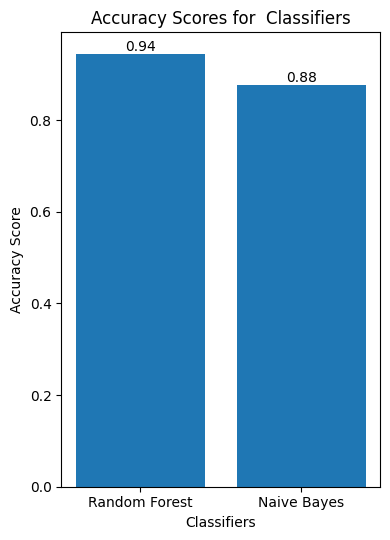

In [307]:
# Data
list_Ascore = [random_accuracy, msg1]
algo_list = ["Random Forest", "Naive Bayes"]


# Add values on top of the bars
for i, v in enumerate(list_Ascore):
    plt.text(i, v, str(round(v, 2)), ha='center', va='bottom')

# Set the figure size
plt.rcParams["figure.figsize"] = [4.00, 5.50]
plt.rcParams["figure.autolayout"] = True


# Plot bar chart with data points
plt.bar(algo_list, list_Ascore)
# giving X and Y labels
plt.xlabel("Classifiers")
plt.ylabel("Accuracy Score")
plt.title("Accuracy Scores for  Classifiers")

# Display the plot
plt.show()


In [ ]:
# identifying important features
print("Important features in predictions: ", features_list)
sorted_feature_importance_scores = sorted(important_feature, key=lambda x: x[1], reverse=True)
print(pd.DataFrame([{'feature': col[0], "score": col[1]} for col in sorted_feature_importance_scores]))
top3_features = [col[0] for col in sorted_feature_importance_scores][:3]

print("\n\nThe top three features are: ", top3_features)


Important features in predictions:  Index(['Week8_Total', 'stat0', 'stat1', 'stat2', 'stat3'], dtype='object')
       feature     score
0  Week8_Total  0.546348
1        stat1  0.170267
2        stat0  0.156662
3        stat2  0.068830
4        stat3  0.057892


The top three features are:  ['Week8_Total', 'stat1', 'stat0']


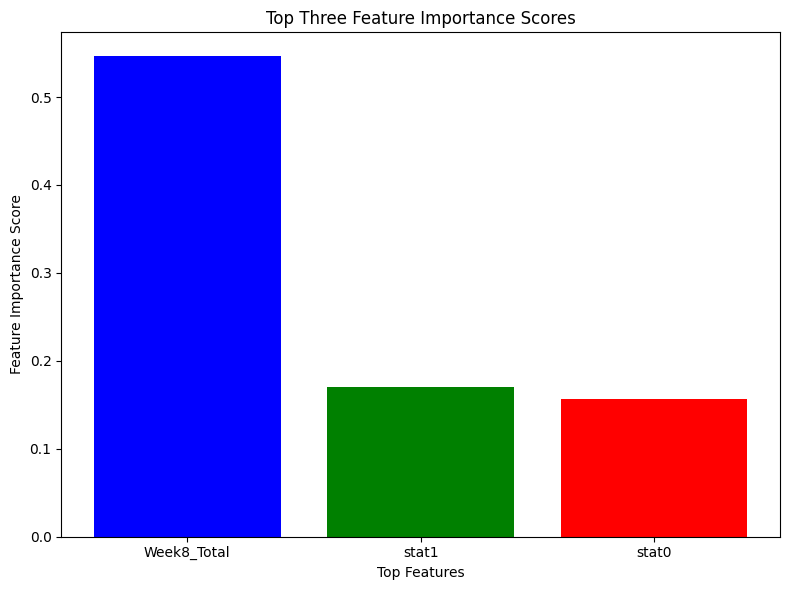

In [ ]:
# List of colors for the top three features
colors = ['blue', 'green', 'red']



# Your code to obtain the top three features
# ...

# Extract the top three feature names and their corresponding scores
top3_feature_names = [col[0] for col in sorted_feature_importance_scores][:3]
top3_feature_scores = [col[1] for col in sorted_feature_importance_scores][:3]

# Create a bar chart for the top three features
plt.figure(figsize=(8, 6))
plt.bar(top3_feature_names, top3_feature_scores, color=colors)

# Add labels and a title
plt.xlabel('Top Features')
plt.ylabel('Feature Importance Score')
plt.title('Top Three Feature Importance Scores')

# Show the plot
plt.tight_layout()
plt.show()
